# 多项式函数拟合实验

In [1]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append('..') 
import d2lzh_pytorch as d2l

# 生成数据集

$$y=1.2x-3.4x^2+5.6x^3+5+\epsilon$$

In [2]:
n_train = 100
n_test = 100
true_w = [1.2, -3.4, 5.6]
true_b = 5

features = torch.randn((n_train + n_test, 1))
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
          + true_w[2] * poly_features[:, 2] + true_b)
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float)

In [3]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = torch.randn((n_train + n_test, 1))

# torch.cat() 拼接数据，1按列拼接，0按行拼接
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1) 
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
          + true_w[2] * poly_features[:, 2] + true_b)
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)


In [4]:
features[:2], poly_features[:2], labels[:2]

(tensor([[0.3827],
         [0.7490]]),
 tensor([[0.3827, 0.1464, 0.0560],
         [0.7490, 0.5609, 0.4201]]),
 tensor([5.2653, 6.3330]))

# 定义、训练和测试模型

In [5]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [6]:
num_epochs, loss = 100, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    # 通过Linear文档可知，pytorch已经将参数初始化了，所以我们这里就不手动初始化了

    batch_size = min(10, train_labels.shape[0])    
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data,
          '\nbias:', net.bias.data)

final epoch: train loss 0.00011005727719748393 test loss 0.00010996264609275386
weight: tensor([[ 1.2011, -3.4008,  5.5996]]) 
bias: tensor([5.0015])


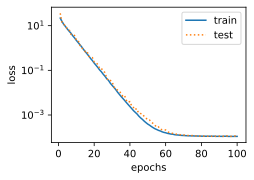

In [7]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], 
             labels[:n_train], labels[n_train:])

# 欠拟合

final epoch: train loss 137.0330352783203 test loss 485.7481384277344
weight: tensor([[17.2417]]) 
bias: tensor([1.1264])


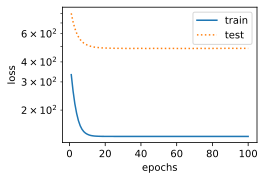

In [10]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train],
             labels[n_train:])

# 训练样本不足（过拟合）

final epoch: train loss 0.11682993918657303 test loss 885.7711181640625
weight: tensor([[1.4479, 1.6817, 0.6464]]) 
bias: tensor([3.9523])


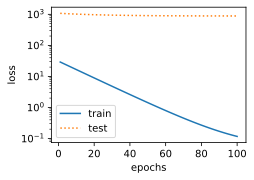

In [9]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :],
             labels[0:2], labels[n_train:])